In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import os

In [2]:
# Load the dataset
c1 = pd.read_excel("case_study1.xlsx")
c2 = pd.read_excel("case_study2.xlsx")

In [3]:
df1 = c1.copy()
df2 = c2.copy()

In [4]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [5]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.75,25668.500,38502.250,51336.0
Total_TL,51336.0,4.858598,7.177116,1.0,1.00,2.000,5.000,235.0
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.00,1.000,3.000,216.0
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.00,1.000,3.000,47.0
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.00,0.000,1.000,27.0
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.00,0.000,1.000,19.0
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.00,0.000,0.308,1.0
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.00,0.000,0.053,1.0
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.25,0.556,1.000,1.0
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.00,0.444,0.750,1.0


In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [10]:
df1.columns.to_list()

['PROSPECTID',
 'Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL']

In [11]:
df2.columns.to_list()

['PROSPECTID',
 'time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'MARITALSTATUS',
 'EDUCATION',
 'AGE',
 'GENDER',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_of_active_TLs_ever',
 'pct_opened_TLs_L6m_of_L12m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'CC_Flag',
 'PL_utilization',
 'PL_Flag',
 'pct_PL_enq_L6m_of_L12m',
 'pct_CC_enq_L6m_of_L12

In [12]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

columns_to_be_removed = []
for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [13]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [14]:
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [15]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [16]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [17]:
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,42064.0,25649.827477,14844.173396,1.0,12776.75,25706.5,38518.25,51336.0
Total_TL,42064.0,5.262980,7.463383,1.0,1.00,3.0,6.00,235.0
Tot_Closed_TL,42064.0,2.967383,6.141098,0.0,0.00,1.0,3.00,216.0
Tot_Active_TL,42064.0,2.295597,2.404086,0.0,1.00,2.0,3.00,47.0
Total_TL_opened_L6M,42064.0,0.812643,1.383559,0.0,0.00,0.0,1.00,27.0
...,...,...,...,...,...,...,...,...
pct_PL_enq_L6m_of_ever,42064.0,0.195497,0.367414,0.0,0.00,0.0,0.00,1.0
pct_CC_enq_L6m_of_ever,42064.0,0.064186,0.225989,0.0,0.00,0.0,0.00,1.0
HL_Flag,42064.0,0.252235,0.434300,0.0,0.00,0.0,1.00,1.0
GL_Flag,42064.0,0.056580,0.231042,0.0,0.00,0.0,0.00,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

C:\Users\gauru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauru\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

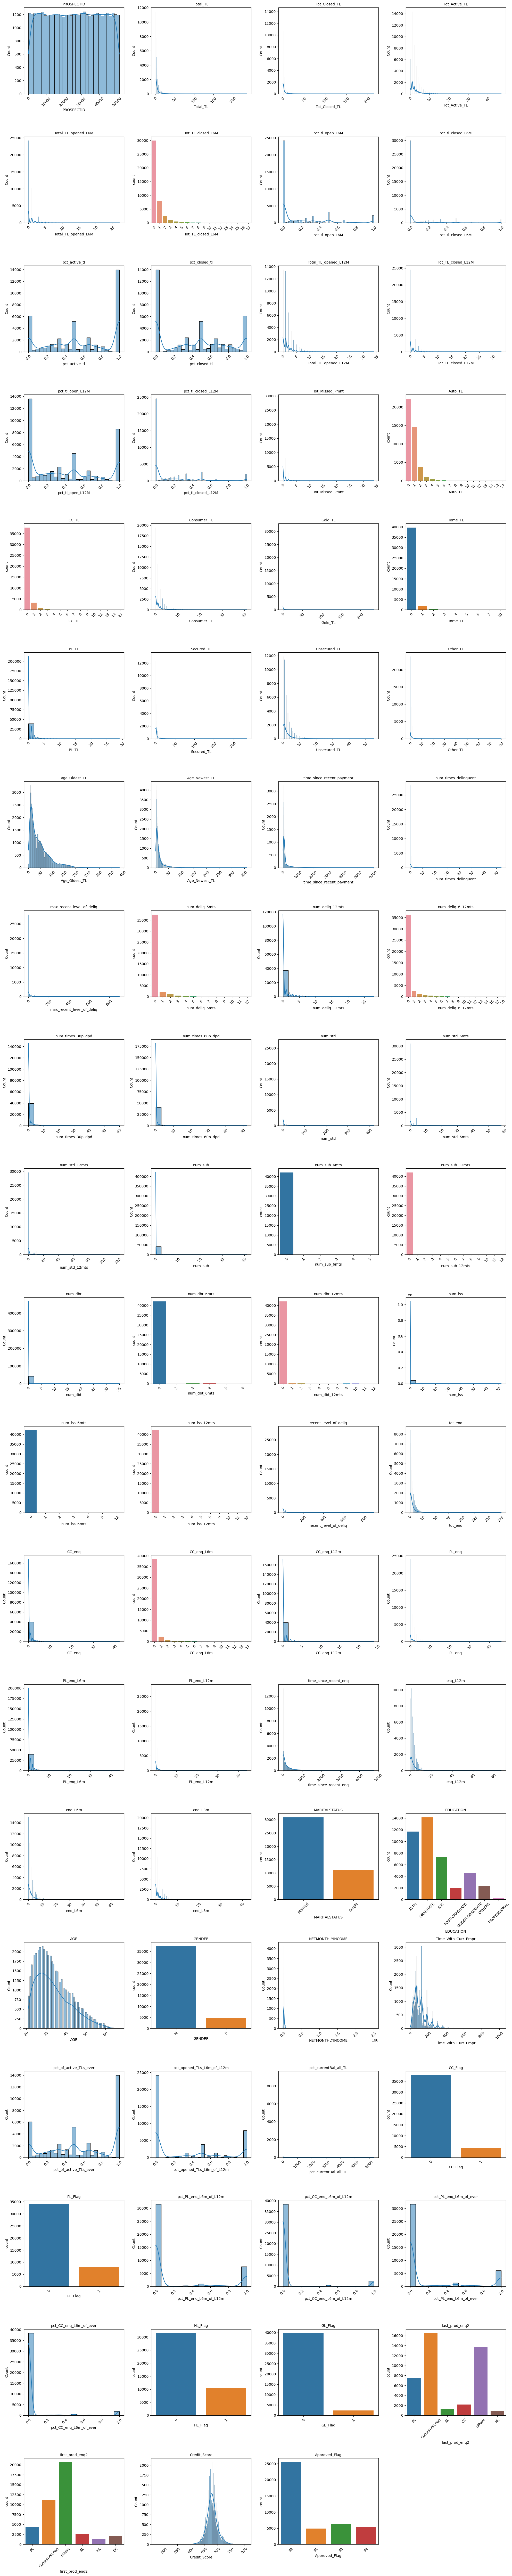

In [20]:
# Graphs

import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_distributions(df):
    # Determine grid size
    cols = 4
    rows = math.ceil(len(df.columns) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        if df[col].dtype == 'object' or df[col].nunique() < 20:
            sns.countplot(x=col, data=df, ax=ax)
        else:
            sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'{col}', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    # Hide extra axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Use the function
plot_distributions(df)

In [21]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [22]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _,a_ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [23]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [24]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [25]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

C:\Users\gauru\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


C:\Users\gauru\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


C:\Users\gauru\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646731
3 --- 5.5813520096427585
4 --- 1.9855843530987785


C:\Users\gauru\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.384346405965587
7 --- 3.064658415523423
8 --- 2.898639771299251
9 --- 4.377876915347322
10 --- 2.2078535836958433
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


C:\Users\gauru\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040112
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.8258570471324314
18 --- 1.5080839450032664
19 --- 2.172088834824577
20 --- 2.623397553527229
21 --- 2.2959970812106176
22 --- 7.360578319196439
22 --- 2.160238777310255
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638256
25 --- 4.753198156284083
26 --- 16.227354755948223
26 --- 6.424377256363872
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.609513476514548
27 --- 13.06755093547673
27 --- 3.500040056654654
28 --- 1.908795587481377
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512906
31 --- 3.424171203217696
32 --- 10.175021454450912
32 --- 6.408710354561296
32 --- 1.0011511962625628
33 --- 3.069197305397274
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.83316497405

In [26]:
# Perform ANOVA for columns_to_keep

from scipy.stats import f_oneway
columns_to_be_kept_numerical = []
for col in columns_to_be_kept:
    groups = [df[df['Approved_Flag'] == group][col] for group in df['Approved_Flag'].unique()]
    f_stat, p_val = f_oneway(*groups)
    if p_val <= 0.05:
        columns_to_be_kept_numerical.append(col)

print("Numerical columns kept after ANOVA:", columns_to_be_kept_numerical)

Numerical columns kept after ANOVA: ['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M', 'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'time_since_recent_payment', 'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag']


In [27]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [28]:
# Import necessary libraries
import pandas as pd

# Select final features for processing
final_features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[final_features + ['Approved_Flag']]

# Define mapping for the EDUCATION column
education_mapping = {
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3
}

# Apply the mapping to the EDUCATION column
df['EDUCATION'] = df['EDUCATION'].map(education_mapping)

# Check for unmapped values in EDUCATION and raise an alert if found
if df['EDUCATION'].isnull().any():
    print("Warning: Unmapped values found in 'EDUCATION'. Please confirm mappings with stakeholders.")

# Convert EDUCATION column to integer type
df['EDUCATION'] = df['EDUCATION'].astype(int)

C:\Users\gauru\AppData\Local\Temp\ipykernel_6300\748439658.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].map(education_mapping)
C:\Users\gauru\AppData\Local\Temp\ipykernel_6300\748439658.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


In [29]:
# Perform one-hot encoding for categorical columns
categorical_columns = ['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display summary of the processed DataFrame
print("Encoded DataFrame Info:")
print(df_encoded.info())
print("Encoded DataFrame Summary:")
print(df_encoded.describe())

Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 

In [30]:
!pip install lightgbm

In [31]:
pip install --upgrade numpy lightgbm scikit-learn


  Using cached numpy-2.2.1-cp311-cp311-win_amd64.whl.metadata (60 kB)


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Dataset preprocessing
x = df_encoded.drop(['Approved_Flag'], axis=1)
y = df_encoded['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# List of models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Evaluation
results = []

for name, model in models.items():
    print(f"----------------------------------------Training {name}---------------------------------------------")
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    
    # Metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, train_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    
    print(f"\n{name} Results:",'\n')
    print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")  
    for i, v in enumerate(label_encoder.classes_):
        print(f"Class {v}:\n")
        print(f"Precision: {precision[i] * 100:.2f}%")
        print(f"Recall: {recall[i] * 100:.2f}%")
        print(f"F1 Score: {f1[i] * 100:.2f}%\n")
    print()

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Results summary
summary = pd.DataFrame({
    "Model": [result["Model"] for result in results],
    "Train Accuracy": [result["Train Accuracy"]*100 for result in results],
    "Test Accuracy": [result["Test Accuracy"]*100 for result in results]
})

print("\nSummary of Model Performances:")
print(summary.sort_values(by=["Test Accuracy", "Train Accuracy"], ascending=[False, False]))

----------------------------------------Training Logistic Regression---------------------------------------------


C:\Users\gauru\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results: 

Train Accuracy: 61.50%
Test Accuracy: 60.87%

Class P1:

Precision: 63.23%
Recall: 13.91%
F1 Score: 22.80%

Class P2:

Precision: 61.03%
Recall: 98.02%
F1 Score: 75.23%

Class P3:

Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%

Class P4:

Precision: 40.70%
Recall: 3.40%
F1 Score: 6.28%


----------------------------------------Training Decision Tree---------------------------------------------

Decision Tree Results: 

Train Accuracy: 100.00%
Test Accuracy: 70.21%

Class P1:

Precision: 72.08%
Recall: 70.51%
F1 Score: 71.29%

Class P2:

Precision: 81.34%
Recall: 80.63%
F1 Score: 80.99%

Class P3:

Precision: 33.91%
Recall: 35.25%
F1 Score: 34.57%

Class P4:

Precision: 62.99%
Recall: 63.85%
F1 Score: 63.42%


----------------------------------------Training Random Forest---------------------------------------------

Random Forest Results: 

Train Accuracy: 100.00%
Test Accuracy: 76.44%

Class P1:

Precision: 83.41%
Recall: 70.41%
F1 Score: 76.36%

Class

In [53]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Assuming x and y_encoded are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the CatBoostClassifier with the initial set of hyperparameters
cat_model = CatBoostClassifier(verbose=0)  

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on the training set
train_accuracy = best_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Best Hyperparameters: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Test Accuracy: 0.782241768691311
Training Accuracy: 0.8043445960001189


In [55]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Prediction On Unseen Data

In [57]:
c3 = pd.read_excel("Unseen_Dataset.xlsx")

In [58]:
cols_in_df = list(df.columns)
cols_in_df.pop(42)

'Approved_Flag'

In [59]:
df_unseen = c3[cols_in_df]

In [60]:
df_unseen['MARITALSTATUS'].unique()
df_unseen['EDUCATION'].unique()
df_unseen['GENDER'].unique()
df_unseen['last_prod_enq2'].unique()
df_unseen['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [61]:
df_unseen.loc[df_unseen['EDUCATION']=='SSC',['EDUCATION']] = 1
df_unseen.loc[df_unseen['EDUCATION']=='12TH',['EDUCATION']] = 2
df_unseen.loc[df_unseen['EDUCATION']=='GRADUATE',['EDUCATION']] = 3
df_unseen.loc[df_unseen['EDUCATION']=='UNDER GRADUATE',['EDUCATION']] = 3
df_unseen.loc[df_unseen['EDUCATION']=='POST-GRADUATE',['EDUCATION']] = 4
df_unseen.loc[df_unseen['EDUCATION']=='OTHERS',['EDUCATION']] = 1
df_unseen.loc[df_unseen['EDUCATION']=='PROFESSIONAL',['EDUCATION']] = 3

In [62]:
df_unseen['EDUCATION'].value_counts()
df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)
df_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            100 non-null    float64
 1   pct_tl_closed_L6M          100 non-null    float64
 2   Tot_TL_closed_L12M         100 non-null    int64  
 3   pct_tl_closed_L12M         100 non-null    float64
 4   Tot_Missed_Pmnt            100 non-null    int64  
 5   CC_TL                      100 non-null    int64  
 6   Home_TL                    100 non-null    int64  
 7   PL_TL                      100 non-null    int64  
 8   Secured_TL                 100 non-null    int64  
 9   Unsecured_TL               100 non-null    int64  
 10  Other_TL                   100 non-null    int64  
 11  Age_Oldest_TL              100 non-null    int64  
 12  Age_Newest_TL              100 non-null    int64  
 13  time_since_recent_payment  100 non-null    int64  


In [63]:
# Perform one-hot encoding for categorical columns
categorical_columns = ['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df_encoded_unseen = pd.get_dummies(df_unseen, columns=categorical_columns)

# Display summary of the processed DataFrame
print("Encoded DataFrame Info:")
print(df_encoded_unseen.info())
print("Encoded DataFrame Summary:")
print(df_encoded_unseen.describe())

Encoded DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               100 non-null    float64
 1   pct_tl_closed_L6M             100 non-null    float64
 2   Tot_TL_closed_L12M            100 non-null    int64  
 3   pct_tl_closed_L12M            100 non-null    float64
 4   Tot_Missed_Pmnt               100 non-null    int64  
 5   CC_TL                         100 non-null    int64  
 6   Home_TL                       100 non-null    int64  
 7   PL_TL                         100 non-null    int64  
 8   Secured_TL                    100 non-null    int64  
 9   Unsecured_TL                  100 non-null    int64  
 10  Other_TL                      100 non-null    int64  
 11  Age_Oldest_TL                 100 non-null    int64  
 12  Age_Newest_TL                 100 non-nul

In [64]:
import pandas as pd

# Retrieve the trained CatBoost model from your models dictionary
catboost_model = models["CatBoost"]

# Align columns with the training data to ensure consistency
x_unseen = df_encoded_unseen[x_train.columns]

# Predict on the unseen dataset using the pre-trained CatBoost model
unseen_predictions_cat = catboost_model.predict(x_unseen)

# Append the predictions as a new column to the original unseen data
df_encoded_unseen['Predicted_Approved_Flag'] = unseen_predictions_cat

# Save the dataframe with all columns and predictions to an Excel file
output_filename = "unseen_predictions_with_catboost.xlsx"
df_encoded_unseen.to_excel(output_filename, index=False)

print(f"\nPredictions exported to {output_filename}.")


Predictions exported to unseen_predictions_with_catboost.xlsx.


In [66]:
import os
print(os.getcwd())

C:\Users\gauru


In [77]:
# Define the output file path for saving predictions
output_filename = r"D:\Prediction\unseen_predictions_catboost.xlsx"

df_encoded_unseen.to_excel(output_filename, index=False)

print(f"\nPredictions exported to {output_filename}.")


Predictions exported to D:\Prediction\unseen_predictions_catboost.xlsx.
